In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [2]:
import env 
import acquire
import prepare
import model
import split_scale

# ACQUIRE

In [3]:
raw_df = acquire.get_telco_chunk()

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges 

In [ ]:
raw_df = raw_df.set_index('customer_id')

In [ ]:
raw_df.head()

### It's acquired, now
# PREPARE

In [5]:
df = prepare.prep_telco()

In [6]:
# # Use a label encoder to transform the embarked column.
def encode_variable(column, df):
    lab_enc = LabelEncoder()
    lab_enc.fit(df[column])
    df[column] = lab_enc.transform(df[column])

In [ ]:
## I wanted to do this inside the prepare module, but it was not cooperating.

In [7]:
cat_cols = df.select_dtypes('object').columns
for i in cat_cols:
    encode_variable(i, df)

In [8]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
customer_id,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,9,1,0,1,0,2,0,2,2,0,2,1,2,65.6,593.30,0
0003-MKNFE,1,0,0,0,9,1,2,1,0,0,0,0,0,2,1,0,2,59.9,542.40,0
0004-TLHLJ,1,0,0,0,4,1,0,2,0,0,2,0,0,0,1,1,1,73.9,280.85,1
0011-IGKFF,1,1,1,0,13,1,0,2,0,2,2,0,2,2,1,1,1,98.0,1237.85,1
0013-EXCHZ,0,1,1,0,3,1,0,2,0,0,0,2,2,0,1,1,2,83.9,267.40,1


## TEST/SPLIT X/y

In [9]:
X = df.drop('churn',axis=1)
#X = df[['monthly_charges']]

In [10]:
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [ ]:
X_train.head()

### PREP is boring, Let's 
# MODEL AND CHART STUFF. 
# OR EXPLORE. 
I guess.

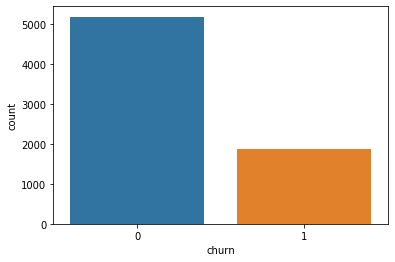

In [11]:
sns.countplot(x='churn', data=df)

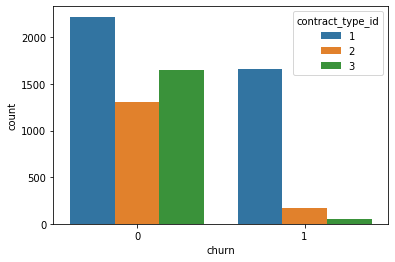

In [13]:
sns.countplot(x='churn', data=df, hue='contract_type_id')

In [ ]:
#Boxplot to show the distribution of ages. X is class, Y is age.
plt.figure(figsize = (10,7))
sns.boxplot(x='churn', y='tenure', data=df)

# MODEL, Decision-Tree

In [ ]:
model.do_the_decisionTree('gini', X_train, y_train)

In [ ]:
model.do_the_decisionTree('entropy', X_train, y_train)

# MODEL, log-reg

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
predictions = logmodel.predict(X_train)
predictions_probas = logmodel.predict_proba(X_train)

In [ ]:
predictions_probas[:,0] < .5

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_train, predictions)

In [ ]:
cnf_matrix

In [ ]:
logreg_report = metrics.classification_report(y_train, predictions, output_dict=True)

In [ ]:
logreg_report['0']

In [ ]:
logreg_report['1']

# MONTH2MONTH vs 1-Year

In [20]:
def get_month2month():
    query = '''
    SELECT 
    *
    FROM 
    customers
    WHERE contract_type_id = 1
    AND tenure = 12
    ;
    '''
    df = pd.read_sql(query, get_db_url('telco_churn'))
    return df

In [21]:
def get_db_url(db):
    return f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'

In [22]:
m2m = get_month2month()

In [23]:
m2m

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0135-NMXAP,Female,0,No,No,12,Yes,Yes,2,No,...,No,No,Yes,No,1,Yes,3,89.75,1052.4,Yes
1,0208-BPQEJ,Female,0,Yes,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,3,19.40,198.1,No
2,0282-NVSJS,Female,1,Yes,Yes,12,No,No phone service,1,No,...,No,Yes,No,No,1,Yes,2,29.30,355.9,No
3,0547-HURJB,Male,0,No,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,4,21.05,235.8,No
4,0603-OLQDC,Male,0,No,Yes,12,Yes,No,1,Yes,...,No,No,Yes,Yes,1,Yes,2,69.85,837.5,No
5,0719-SYFRB,Female,0,No,No,12,Yes,Yes,1,Yes,...,Yes,Yes,No,No,1,Yes,2,61.65,713.75,Yes
6,0953-LGOVU,Male,0,Yes,Yes,12,No,No phone service,1,No,...,No,Yes,No,No,1,No,2,35.50,432.25,No
7,1202-KKGFU,Female,0,Yes,No,12,Yes,No,1,Yes,...,No,Yes,No,No,1,No,3,54.20,690.5,No
8,1218-VKFPE,Female,0,Yes,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,2,19.00,233.55,Yes
9,1271-SJBGZ,Male,1,No,No,12,No,No phone service,1,No,...,Yes,Yes,No,Yes,1,Yes,1,43.65,526.95,Yes
